In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sc
import os

In [26]:
path=r'E:\data files\\Visadataset.csv'
vdf=pd.read_csv(path)

In [27]:
cat_column=vdf.select_dtypes(include='object').columns
num_column=vdf.select_dtypes(exclude='object').columns
num_column

Index(['no_of_employees', 'yr_of_estab', 'prevailing_wage'], dtype='object')

In [29]:
**box plot**

it is used to identify the outliers

outlier is an observationhaving huge +ve value or huge -ve value

q1 = 25p , q2 = 50p , q3 = 75p

iqr=inter quartile range=q3-q1

q3+1.5*iqr and q1-1.5*iqr





Q1-1.5IQR   Q1   median  Q3   Q3+1.5IQR
                       |-----:-----|
       o      |--------|     :     |--------|    o  o
                       |-----:-----|
     flier             <----------->            fliers
                            IQR


IndentationError: unindent does not match any outer indentation level (<tokenize>, line 19)

In [30]:
wage=vdf['prevailing_wage']
wage

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25475     77092.5700
25476    279174.7900
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25480, dtype: float64

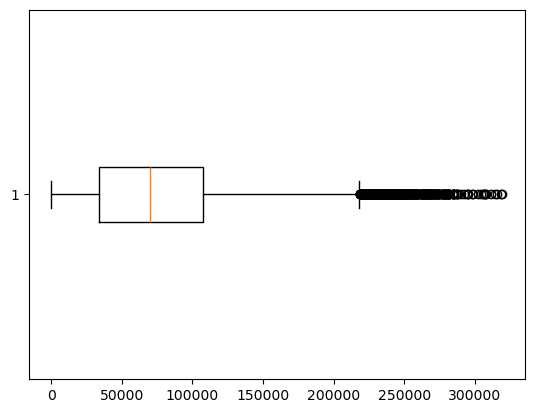

In [31]:
plt.boxplot(wage,vert=False)
plt.show()

<Axes: >

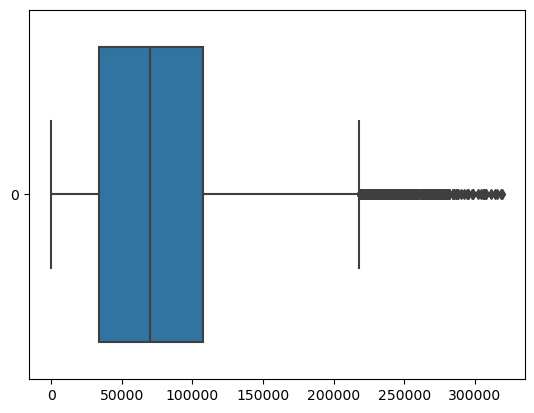

In [32]:
sc.boxplot(wage,orient='h')

In [33]:
**draw histo and box side by side

SyntaxError: invalid syntax (786835550.py, line 1)

Text(0.5, 0, 'box plot')

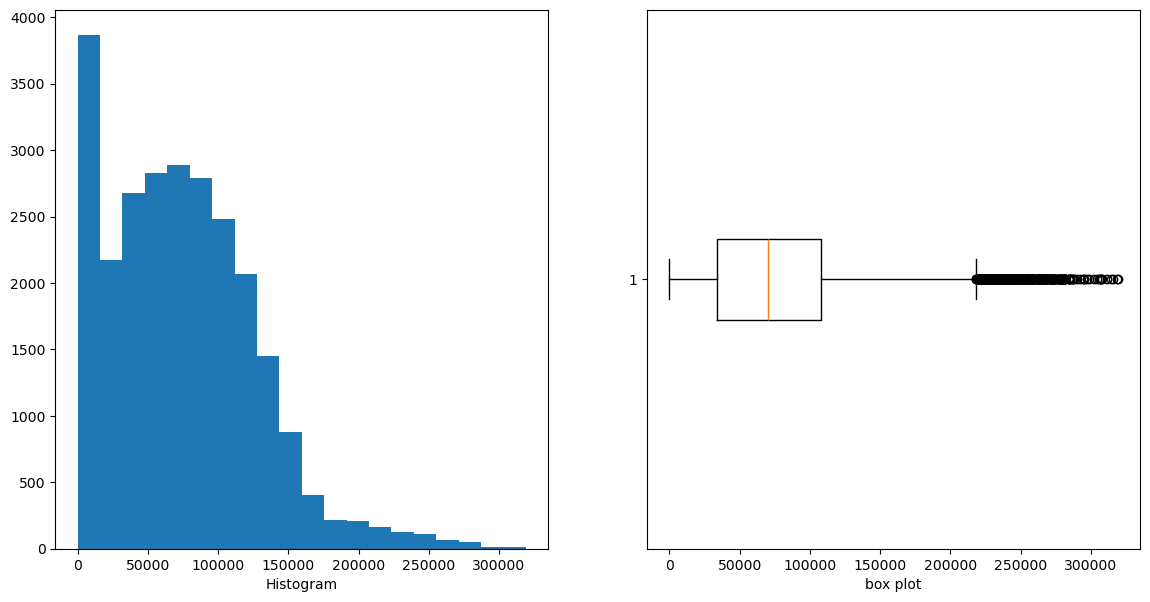

In [34]:
plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.hist(wage, bins=20)
plt.xlabel('Histogram')
plt.subplot(1,2,2)
plt.boxplot(wage,vert=False)
plt.xlabel('box plot')

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

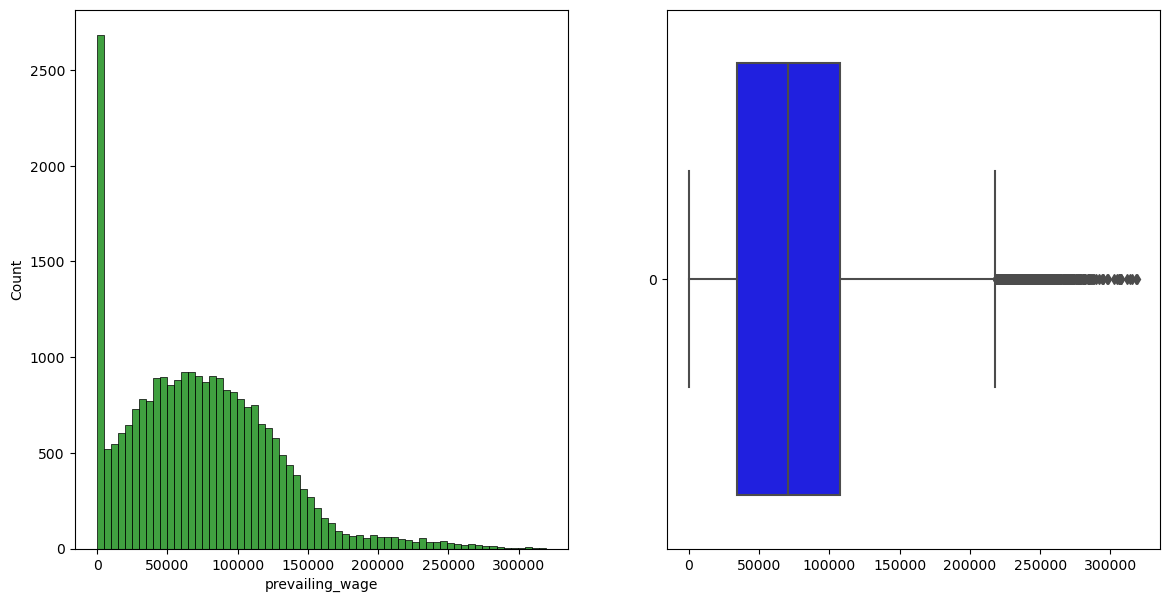

In [35]:
fig,axes=plt.subplots(1,2,figsize=(14,7))
sc.histplot(wage, ax=axes[0], color='green')
sc.boxplot(wage, ax=axes[1], color='blue',orient='h')

finding the outliers

- we already know that outliers availabe less than Q1-1.5*IQR AND Q1+1.5*IQR

- step-1:

    - calculate Q1=25P

    - calculate Q2=50p

    - calculate Q3=75p

- step-2:

    - calculate IQR=Q3-Q1

- step-3:

    - calculate LB=Q1-1.5*IQR

    - calculate UB=Q3+1.5*IQR

- step-4:

    - con1= wage_data<LB   t/f

    - CON2= wage_data>ub   t/f

    - con3= c1 or/and con2 use bitwise operator for each con 2 con are their
    
    bitwise used to compare bits data ===0 and 1 === true and false
    
    AND (&), OR (|)

In [36]:
q1=np.percentile(vdf['prevailing_wage'],25)
q2=np.percentile(vdf['prevailing_wage'],50)
q3=np.percentile(vdf['prevailing_wage'],75)

In [37]:
iqr=q3-q1

In [38]:
lb=q1-(1.5*iqr)
ub=q3+(1.5*iqr)

In [39]:
c1=wage<lb
c2=wage>ub
con3=c1 | c2
out=wage[con3]

In [40]:
pd.DataFrame(out)

,prevailing_wage
14,220081.73
34,225569.73
130,247393.01
216,269321.68
221,219529.62
...,...
25191,280482.51
25195,234308.77
25468,272715.74
25469,273772.47


In [41]:
out=vdf[con3]
out

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
14,EZYV15,Asia,Master's,Y,Y,15756,2006,South,220081.73,Year,Y,Certified
34,EZYV35,Asia,Master's,N,N,1809,2010,South,225569.73,Year,N,Certified
130,EZYV131,South America,High School,N,N,2554,2005,Midwest,247393.01,Year,Y,Certified
216,EZYV217,Asia,Master's,Y,N,1515,2001,Midwest,269321.68,Year,N,Certified
221,EZYV222,North America,Doctorate,Y,Y,2518,2010,South,219529.62,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25191,EZYV25192,Asia,Master's,N,N,4983,2005,Midwest,280482.51,Year,Y,Denied
25195,EZYV25196,North America,Master's,Y,N,47,2001,South,234308.77,Year,N,Certified
25468,EZYV25469,Asia,Bachelor's,N,N,373,2005,Midwest,272715.74,Year,N,Certified
25469,EZYV25470,North America,Master's,Y,N,2261,1997,Northeast,273772.47,Year,N,Certified


In [42]:
c1=wage>lb
c2=wage<ub
con3=c1 & c2
out1=vdf[con3]

In [43]:
out1

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25474,EZYV25475,Africa,Doctorate,N,N,2594,1979,Northeast,51104.7800,Year,Y,Certified
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [44]:
non_outliers=out1['prevailing_wage']
non_outliers

0           592.2029
1         83425.6500
2        122996.8600
3         83434.0300
4        149907.3900
            ...     
25474     51104.7800
25475     77092.5700
25477    146298.8500
25478     86154.7700
25479     70876.9100
Name: prevailing_wage, Length: 25053, dtype: float64

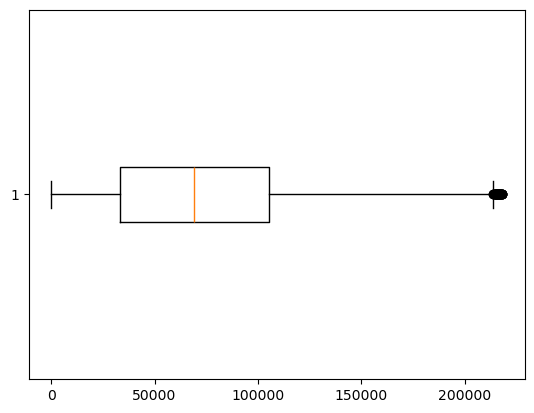

In [45]:
non_outliers=out1['prevailing_wage']
plt.boxplot(non_outliers, vert=False)
plt.show()

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: >

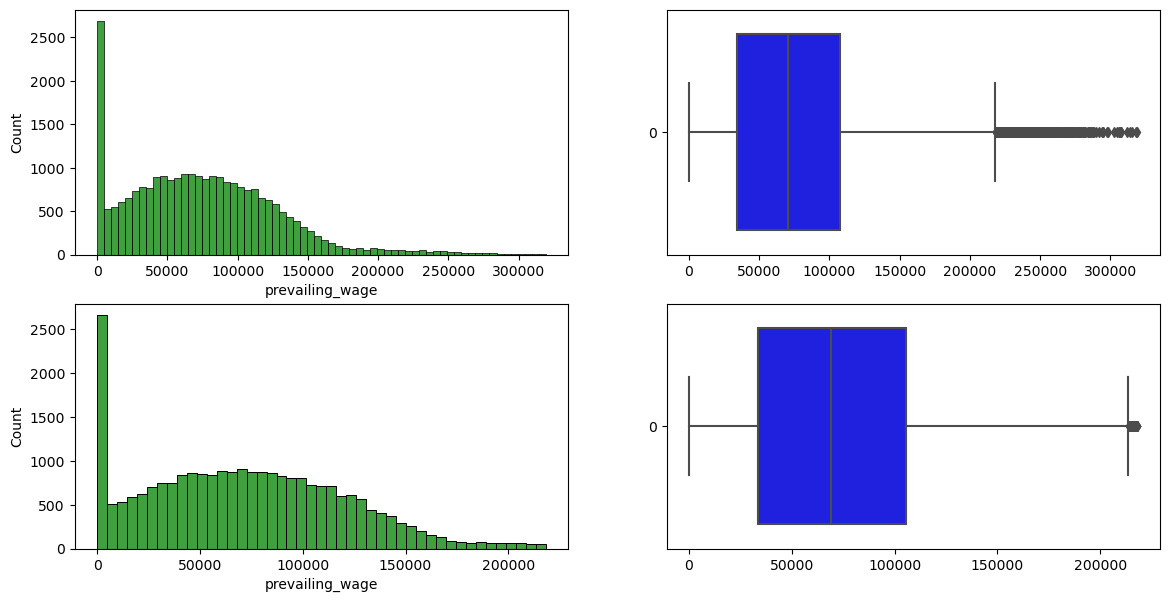

In [46]:
fig,axes=plt.subplots(2,2,figsize=(14,7))
sc.histplot(wage, ax=axes[0,0], color='green')
sc.boxplot(wage, ax=axes[0,1], color='blue',orient='h')
sc.histplot(non_outliers, ax=axes[1,0], color='green')
sc.boxplot(non_outliers, ax=axes[1,1], color='blue',orient='h')

In [47]:
wage_median=wage.median()
wage_median

70308.20999999999

In [48]:

dict(out)
ou1=[value for key,value in dict(out).items()]
ou1

[14          EZYV15
 34          EZYV35
 130        EZYV131
 216        EZYV217
 221        EZYV222
            ...    
 25191    EZYV25192
 25195    EZYV25196
 25468    EZYV25469
 25469    EZYV25470
 25476    EZYV25477
 Name: case_id, Length: 427, dtype: object,
 14                Asia
 34                Asia
 130      South America
 216               Asia
 221      North America
              ...      
 25191             Asia
 25195    North America
 25468             Asia
 25469    North America
 25476             Asia
 Name: continent, Length: 427, dtype: object,
 14          Master's
 34          Master's
 130      High School
 216         Master's
 221        Doctorate
             ...     
 25191       Master's
 25195       Master's
 25468     Bachelor's
 25469       Master's
 25476    High School
 Name: education_of_employee, Length: 427, dtype: object,
 14       Y
 34       N
 130      N
 216      Y
 221      Y
         ..
 25191    N
 25195    Y
 25468    N
 25469    Y
 25476

In [49]:
for i in ou1:
    for j in vdf['prevailing_wage']:
        if i==j:
            j=wage_median
        

ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [50]:
vdf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,279174.7900,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [54]:
import pandas as pd
wage = vdf['prevailing_wage']
prevailing_wage = vdf['prevailing_wage']
wage_median = wage.median()
Q1 = prevailing_wage.quantile(0.25)
Q3 = prevailing_wage.quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers_below = prevailing_wage < lower_bound
outliers_above = prevailing_wage > upper_bound
vdf.loc[outliers_below | outliers_above, 'prevailing_wage'] = wage_median
vdf


,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


In [61]:
w1=out['prevailing_wage']
w2=out1['prevailing_wage']
df1=pd.DataFrame(w1)
df2=pd.DataFrame(w2)

<Axes: >

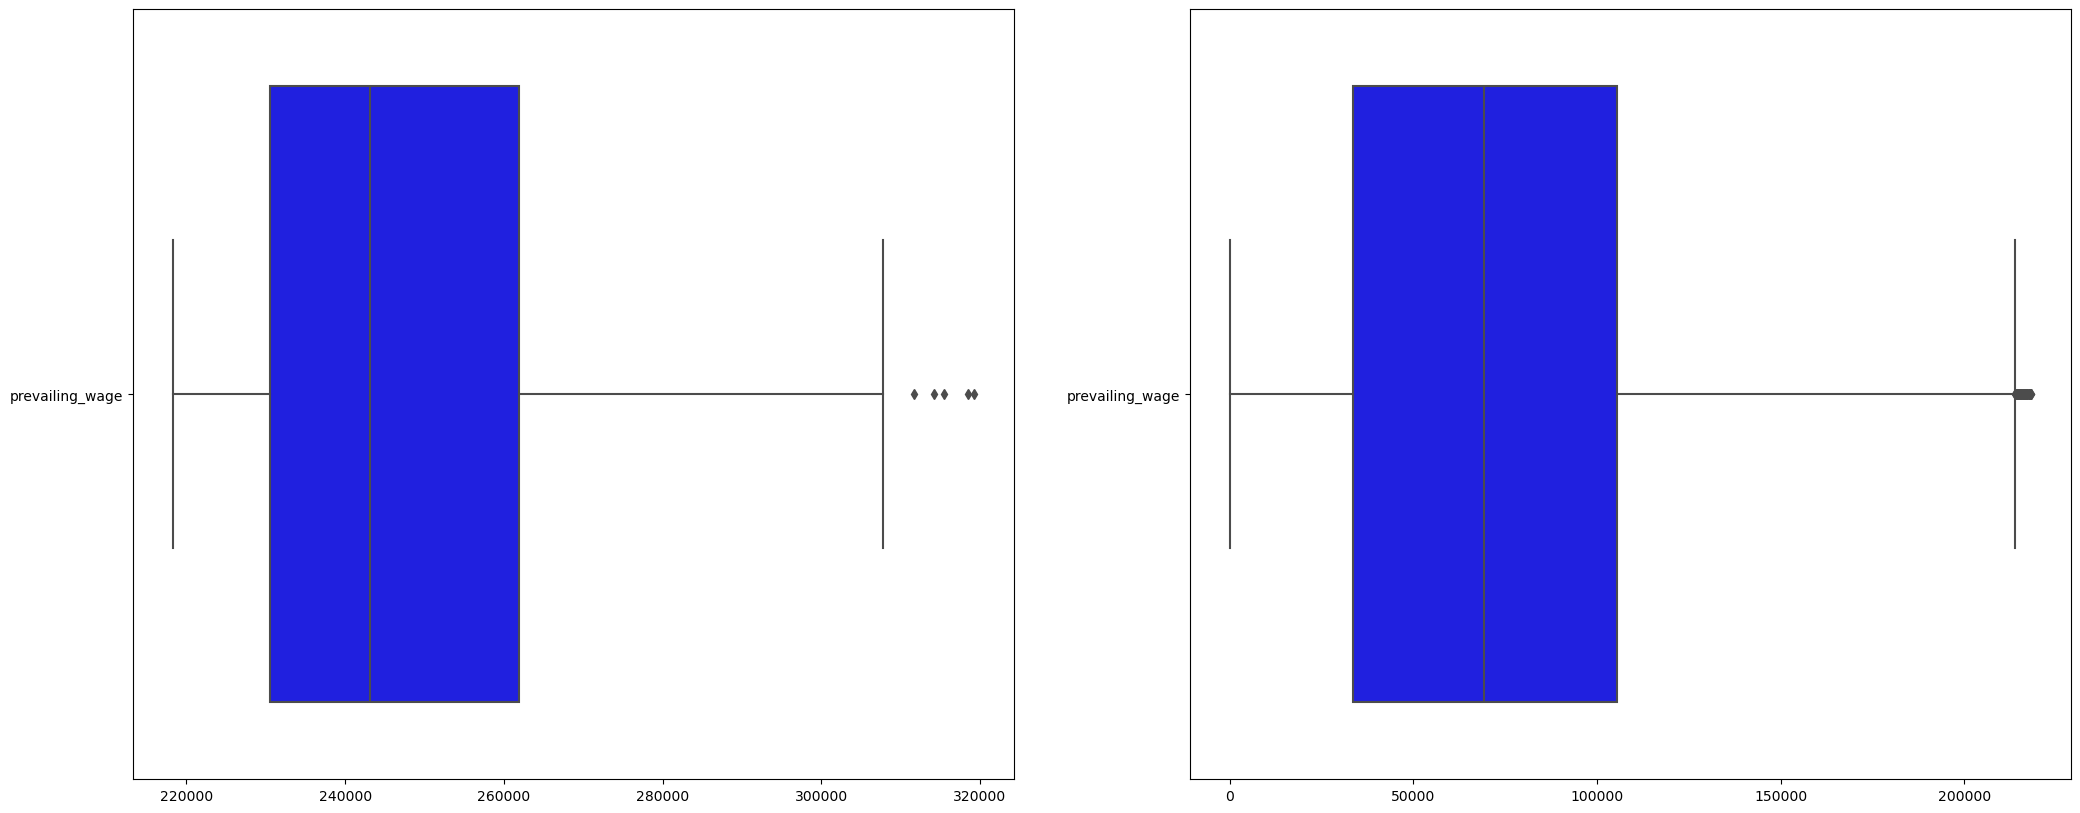

In [62]:
fig,axes=plt.subplots(1,2,figsize=(25,10))
sc.boxplot(df1, ax=axes[0], color='blue',orient='h')
sc.boxplot(df2, ax=axes[1], color='blue',orient='h')

E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
E:\anaconda\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='prevailing_wage', ylabel='Count'>

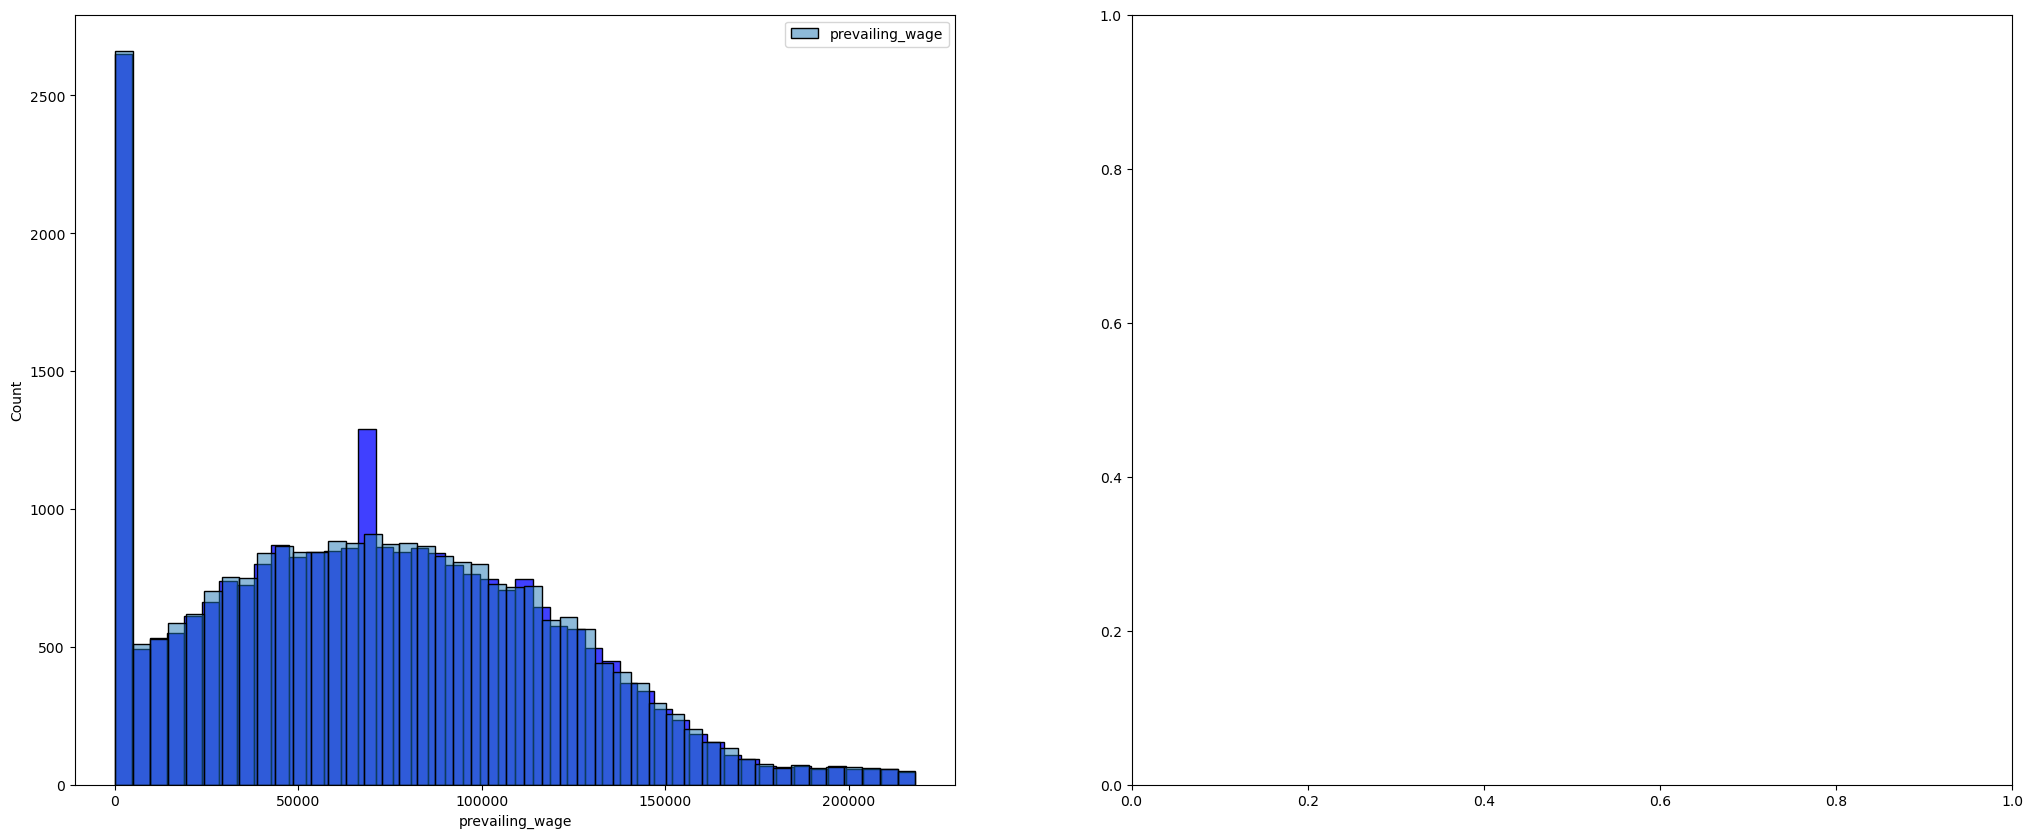

In [84]:
fig,axes=plt.subplots(1,2,figsize=(25,10))
sc.histplot(wage, ax=axes[0], color='blue')
sc.histplot(df2, ax=axes[0], color='orange')

In [ ]:
**how to deal outliers**
1 we can drop the outliers
    
    - it is not recommended but it is easy
    
    - if we drop outliers we drop the rows
    
    - which means we are dropping the other column values
    
    - may be some imp info we might loose from the clumn values
    
    - but in industry if outlier less then 2% of the total data, we can drop
    
    - no of outlierr is 427, totoal data is 25480
    
    - the percent is 1.67
    
2. we fill with median value

    - we already know that outliers doesnot affects median
    
    - so it is best practice to fill the outlier with median values
    
3. capping or florring

    - instead fill with median we can fill with certain values
    
    - the outliers which are < lb fill with lb value only
    
    - the outliers > ub is filled with ub value only
    
- **isolation forest**

    - ml model used to find the outliers and anamolies

**fill the median value**

*np.where**

- it takes three arguements:
    
    - 1. condition
    
    - 2. value if condition os True
    
    - 3. value if condition is False
    
- it is applicable only for binary condition means if and else

In [66]:
for value in wage:
    print(value)

592.2029
83425.65
122996.86
83434.03
149907.39
78252.14
53635.39
418.2298
74362.19
67514.76
83588.56
70813.09
28663.05
107196.03
70308.20999999999
74108.02
3706.79
16132.61
150441.13
79948.12
71128.98
137694.98
45642.39
90108.38
71286.04
99489.65
86332.95
103029.33
40925.86
189190.48
79594.12
135866.13
72077.57
81921.18
70308.20999999999
92421.92
2490.12
110817.26
50960.01
125336.9
39633.32
156326.33
43630.58
54614.42
28989.87
22924.91
61567.75
156251.17
86022.02
49565.37
66191.41
95623.2
115014.05
35018.04
230.8072
113799.64
85854.09
14174.04
47176.84
4949.28
67410.59
58791.58
103.2216
62591.57
102919.59
123468.56
82324.64
5319.49
153019.94
38059.89
230.327
61521.92
121316.5
122540.55
47170.76
330.3743
2927.34
107781.48
590.0203
194176.83
102073.81
113882.38
70778.82
84125.48
174014.59
34213.17
79813.05
113327.34
78893.64
140290.16
111926.01
125880.21
527.8901
49357.95
69335.2
99737.18
91449.62
34494.86
395.995
159645.51
28243.79
43421.88
80253.78
115235.95
95200.86
41613.52
64137.41


In [67]:
dict1={'sub':['ds','daa','coa'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,ds,100
1,daa,200
2,coa,300


In [73]:
#q i want to replace maarks with 1 which are greater then 100
w=[]
ma=df['marks']
for i in ma:
    if i > 100:
        w.append(1)
    else:
        w.append(i)
        
df['marks']=w
df

,sub,marks,new
0,ds,100,100
1,daa,1,1
2,coa,1,1


In [74]:
dict1={'sub':['ds','daa','coa'],'marks':[100,200,300]}
df=pd.DataFrame(dict1)
df

,sub,marks
0,ds,100
1,daa,200
2,coa,300


In [76]:
con=df['marks']>100
l=np.where(con,1,df['marks'])
df['marks']=l
df

,sub,marks
0,ds,100
1,daa,1
2,coa,1


In [ ]:
**np.where(<condition><true><false>)

In [78]:
wage=vdf['prevailing_wage']
con1=wage<lb
con2=wage>ub
con=con1|con2
m=wage.median()
l=np.where(con,m,wage)
vdf['prevailing_wage']=l
vdf

,case_id,continent,education_of_employee,has_job_experience,requires_job_training,no_of_employees,yr_of_estab,region_of_employment,prevailing_wage,unit_of_wage,full_time_position,case_status
0,EZYV01,Asia,High School,N,N,14513,2007,West,592.2029,Hour,Y,Denied
1,EZYV02,Asia,Master's,Y,N,2412,2002,Northeast,83425.6500,Year,Y,Certified
2,EZYV03,Asia,Bachelor's,N,Y,44444,2008,West,122996.8600,Year,Y,Denied
3,EZYV04,Asia,Bachelor's,N,N,98,1897,West,83434.0300,Year,Y,Denied
4,EZYV05,Africa,Master's,Y,N,1082,2005,South,149907.3900,Year,Y,Certified
...,...,...,...,...,...,...,...,...,...,...,...,...
25475,EZYV25476,Asia,Bachelor's,Y,Y,2601,2008,South,77092.5700,Year,Y,Certified
25476,EZYV25477,Asia,High School,Y,N,3274,2006,Northeast,70308.2100,Year,Y,Certified
25477,EZYV25478,Asia,Master's,Y,N,1121,1910,South,146298.8500,Year,N,Certified
25478,EZYV25479,Asia,Master's,Y,Y,1918,1887,West,86154.7700,Year,Y,Certified


(array([4580., 3368., 3890., 4369., 3507., 2860., 1643.,  706.,  295.,
         262.]),
 array([2.13670000e+00, 2.18113840e+04, 4.36206314e+04, 6.54298787e+04,
        8.72391260e+04, 1.09048373e+05, 1.30857621e+05, 1.52666868e+05,
        1.74476115e+05, 1.96285363e+05, 2.18094610e+05]),
 <BarContainer object of 10 artists>)

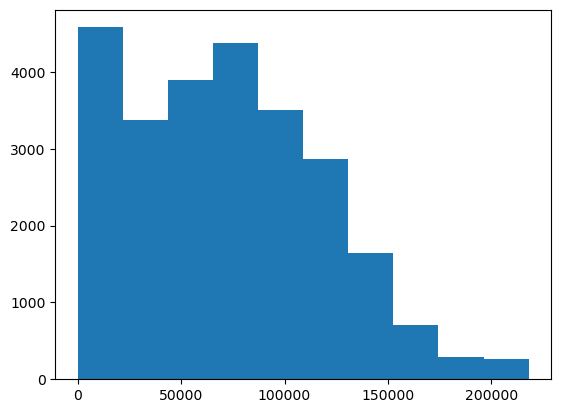

In [79]:
plt.hist(vdf['prevailing_wage'])